## Supervised Vs Unsupervised Learning



Most of the machine learning algorithms fall into one of two categories: supervised or unsupervised. The algorithms we have discussed so far in this course fall under supervised learning domain. For each observation measurement $x_i$, where $i = 1, . . . , n$ there is an associated response measurement $y_i$. The model is fit such that it relates the response to the independent variables, so that it can accurately predict the response for future observations. Classical statistical learning methods such as linear regression and logistic regression as well as modern approaches such as GAM, boosting, and support vector machines, operate in the supervised learning domain.


On the other hand, in unsupervised learning there are n observations $x_i$ where $i=1, . . . , n$ but no associated response $y_i$. It is not possible to fit a linear regression model or any other models we learned already, since there is no response variable to predict. The situation is referred to as unsupervised because we lack a response variable that can supervise the model to learn.

So what kind of analysis can be done here? One can try to understand the relationships between the variables, or between the observations. Concept of cluster analysis, or clustering can be applied. The goal of cluster analysis is to ascertain, on the basis of x1, . . . , xn, whether the observations can form relatively distinct groups.

For example, in a market segmentation study we can try to cluster the customers on the basis of the variables measured, in order to identify distinct groups of potential customers. Identifying such groups can be of interest because it might be that the groups differ with respect to some property of interest, such as spending habits.

Below image shows a clustering data set involving three groups. Each group is shown using a different colored symbol. The left image shows three groups that are well-separated. In this kind of setting, a clustering approach should successfully identify the three groups. In the right, there is some overlap among the groups. Here clustering task is more challenging.

<img src="../images/cluster1.JPG">

One cannot expect a clustering method to assign all of the overlapping points to their correct group. In the example shown above there are only two variables. So one can simply visually inspect the scatterplots of the observations in order to identify clusters. But in reality, data is high-dimensional, having many more than two variables. In those cases, its not easy to plot the observations.

## K-Means Clustering

Here the observations are partitioned into a pre-specified number of **K** distinct, non-overlapping clusters. Once the desired number of clusters K is specified, K-means algorithm will assign each observation to exactly one of the K clusters. The observations satisfy following two conditions:

    i) Each observation belongs to at least one of the K clusters.
    ii) The clusters are nonoverlapping. No observation belongs to more than one cluster

The idea behind K-means clustering is that a good clustering is one for which the within-cluster variation is as small as possible. The within-cluster variation for cluster Ck is a measure W(Ck) of the amount by which the observations within a cluster differ from each other. Hence we want to solve the problem in below equation:

$$\underset{C1,...,CK}{\mathrm{minimize}} \bigg\{\sum_{k=1}^{K} W(C_k) \bigg\}$$

Simply it says that we want to partition the observations into _K_ clusters such that the total within-cluster variation, summed over all _K_ clusters, is as small as possible. In order to make it actionable we need to define the within-cluster variation. There are many possible ways to define this concept, but by far the most common choice involves squared Euclidean distance. That is, we define


$$W(C_k) = \frac{1}{\|{C_k}\|} \sum_{i,{i'} \subset C_k} \sum_{j=1}^P({x_{ij}}-{x_{i'j}})^2$$


where |Ck| denotes the number of observations in the kth cluster. In other words, the within-cluster variation for the kth cluster is the sum of all of the pairwise squared Euclidean distances between the observations in the kth cluster, divided by the total number of observations in the kth cluster.

<img src="../images/kmeans.JPG">

Above image shows the progress of the K-means algorithm. Top left image shows initial observations. Top center image shows step 1 of the algorithm where each observation is randomly assigned to a cluster. Top right image shows step 2(a) of an iteration where cluster centroids are computed. Centroids are shown as large colored disks. In beginning centroids are almost overlapping because the initial cluster assignments were chosen at random. The bottom left image shows is step 2(b) of the iteration, each observation is assigned to the nearest centroid. The bottom center image shows step 2(a) of next iteration, leading to new cluster centroids. The bottom right iamge shows the results obtained after ten iterations.

----
kmeans() function performs K-means clustering in R. We begin with a simple simulated set of observations where there are two clusters in the data. The first 25 observations have a mean shift relative to the next 25 observations.

In [1]:
# Set the seed to reproduce the results
set.seed(4)

# Generate a random normal distribution of 100 values. Generate a matrix out of this normal distribution.
x=matrix(rnorm(50*2), ncol=2)

# Add 3 to rows 1 to 25 in first column of the matrix
x[1:25, 1]=x[1:25, 1] + 3

# Subtract 4 from rows 1 to 25 in second column of the matrix
x[1:25, 2]=x[1:25, 2] - 4

Perform K-means clustering with K = 2.

In [4]:
# Step 1 of K-Means algorithm says 
    # Randomly assign a number, from 1 to K, to each of the observations.These serve as initial cluster assignments for the 
    # observations.

# Step 2
    # Iterate until the cluster assignments stop changing: 
    # (a) For each of the K clusters, compute the cluster centroid. The kth cluster centroid is the vector of the p feature 
    # means for the observations in the kth cluster.
    # (b) Assign each observation to the cluster whose centroid is closest (where closest is defined using Euclidean distance).

# Apply kmeans clustering algorithm on x and divide them into 3 clusters. nstart=20 implies multiple initial cluster assignments
# i'e K-means clustering will be performed using multiple random assignments.

km.fit = kmeans(x,3,nstart = 20)
summary(km.fit)

             Length Class  Mode   
cluster      50     -none- numeric
centers       6     -none- numeric
totss         1     -none- numeric
withinss      3     -none- numeric
tot.withinss  1     -none- numeric
betweenss     1     -none- numeric
size          3     -none- numeric
iter          1     -none- numeric
ifault        1     -none- numeric

The cluster assignments of the 50 observations are present in km.fit$cluster

In [5]:
# Cluster assignment of each observation.
km.fit$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 1 3 1 1 1 3 3 1 3 3 1
[39] 3 3 1 3 1 3 3 3 1 3 1 3

In [6]:
# Clustering results
km.fit

K-means clustering with 3 clusters of sizes 11, 25, 14

Cluster means:
        [,1]        [,2]
1  0.8968634  0.05541174
2  3.4968274 -3.88442866
3 -0.7532448 -0.39907658

Clustering vector:
 [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 1 3 1 1 1 3 3 1 3 3 1
[39] 3 3 1 3 1 3 3 3 1 3 1 3

Within cluster sum of squares by cluster:
[1] 14.391060 33.865779  9.796515
 (between_SS / total_SS =  85.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

We can plot the data, with each observation colored according to its cluster assignment.

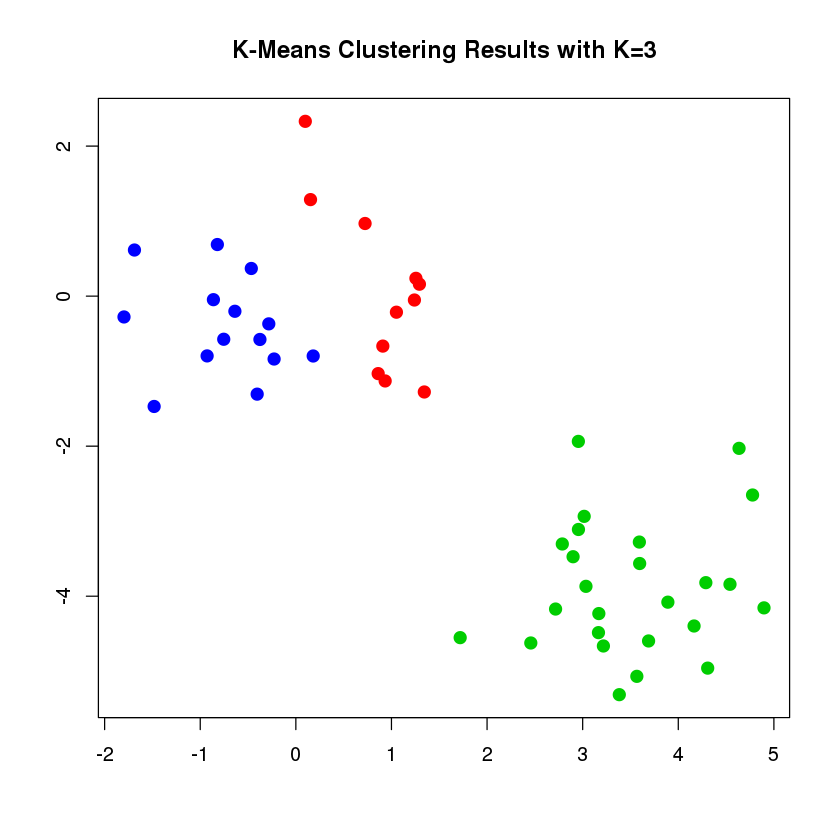

In [7]:
plot(x, col=(km.fit$cluster+1), main="K-Means Clustering Results with K=3", xlab ="", ylab="", pch =20, cex =2)

##### kmeans() with multiple initial cluster assignments explained

Here we compare using nstart=1 to nstart=20

In [8]:
set.seed(3)
km.fit = kmeans(x,3,nstart = 1)
km.fit$tot.withinss

[1] 65.44307

In [9]:
km.fit = kmeans(x,3,nstart = 20)
km.fit$tot.withinss

[1] 58.05335

So km.out\$tot.withinss is the total within-cluster sum of squares, which we seek to minimize by performing K-means clustering. The individual within-cluster sum-of-squares are contained in the vector km.out$withinss. It is strongly recommended to always run K-means clustering with a large value of nstart, such as 20 or 50, since otherwise an undesirable local optimum may be obtained.